In [119]:
import VNA_TDR

td = VNA_TDR.VNA_TDR()

import matplotlib.pyplot as plt
import pandas as pd

#This file has complex data for a transmission line  Fmin = 10M, Fmax = 10G, and N = 1000
data = pd.read_csv("10M_10G_N1000.csv")
data = data.to_numpy()#Turn data into a numpy array

freq = data[:,0]#frequency sweep
S11r = data[:,1]#real data for S11 in a linear format 
S11i = data[:,2]#imaginary data for S11 in a linear format
S11c = [complex(S11r[i],S11i[i]) for i in range(0,len(S11r))] # Form Complex number list

Tstart = 0#Start time to map to
Tstop = 18e-9#End time to map to

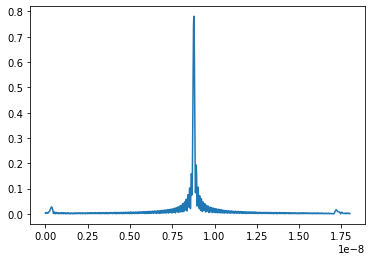

In [115]:
plt.figure(1)
t,x = td.bandpass(S11c, Fstart, Fstop, Tstart, Tstop)#Plot the bandpass response of the frequency data
plt.plot(t,x)

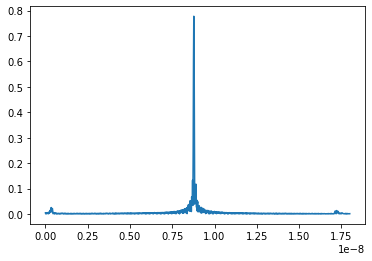

In [116]:
plt.figure(2)
t,x = td.lowpass_impulse(S11c, Fstart, Fstop, Tstart, Tstop)#Plot the bandpass response of the frequency data
plt.plot(t,x)

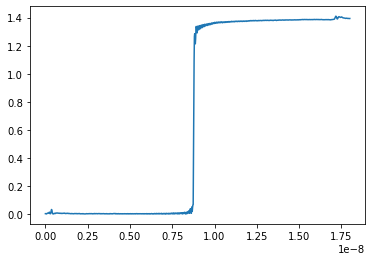

In [117]:
plt.figure(3)
t,x = td.lowpass_step(S11c, Fstart, Fstop, Tstart, Tstop)#Plot the bandpass response of the frequency data
plt.plot(t,x)

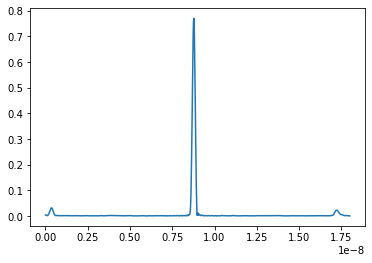

In [122]:
#Varying Beta
td.setBeta(6)#Beta for the kaiser window now equals 6 and not 
plt.figure(4)
t,x = td.bandpass(S11c, Fstart, Fstop, Tstart, Tstop)#compute bandpass, but with a kaiser beta of 6
plt.plot(t,x)

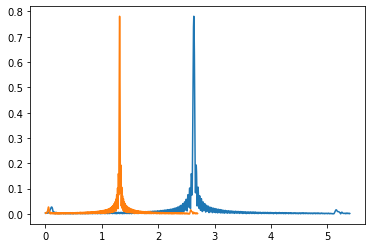

In [124]:
#Varying the x-axis and reflection type
td.setUnit("meters")#X-axis unit("seconds, meters, feet")
td.setBeta(0) #Reset beta value
plt.figure(5)
t,x = td.bandpass(S11c, Fstart, Fstop, Tstart, Tstop)
plt.plot(t, x)
td.setRefType(2)
t,x = td.bandpass(S11c, Fstart, Fstop, Tstart, Tstop)
plt.plot(t, x)
td.setRefType(1)

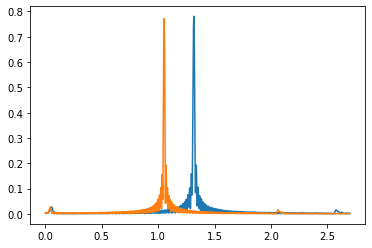

In [139]:
#Varying the velocity factor
td.setVF(1)
plt.figure(6)
t,x = td.bandpass(S11c, Fstart, Fstop, Tstart, Tstop)
plt.plot(t,x)
td.setVF(.8)
t,x = td.bandpass(S11c, Fstart, Fstop, Tstart, Tstop)
plt.plot(t,x)